In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Load the dataset
df = pd.read_csv("D:/Predictive Sem_2nd_material/02_Programming Statistics for business/Group Project/telecom_customer_churn.csv")

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Remove all rows with missing values
df = df.dropna()

In [3]:
# Display all column names and their lengths to check for discrepancies
print("Column Names and their Lengths:")
for col in df.columns:
    print(f"Column: '{col}', Length: {len(col)}")

Column Names and their Lengths:
Column: 'Gender', Length: 6
Column: 'Age', Length: 3
Column: 'Married', Length: 7
Column: 'Number of Dependents', Length: 20
Column: 'Number of Referrals', Length: 19
Column: 'Tenure in Months', Length: 16
Column: 'Offer', Length: 5
Column: 'Phone Service', Length: 13
Column: 'Avg Monthly Long Distance Charges', Length: 33
Column: 'Internet Service', Length: 16
Column: 'Internet Type', Length: 13
Column: 'Avg Monthly GB Download', Length: 23
Column: 'Online Security', Length: 15
Column: 'Online Backup', Length: 13
Column: 'Device Protection Plan', Length: 22
Column: 'Premium Tech Support', Length: 20
Column: 'Streaming TV', Length: 12
Column: 'Streaming Movies', Length: 16
Column: 'Streaming Music', Length: 15
Column: 'Unlimited Data', Length: 14
Column: 'Contract', Length: 8
Column: 'Monthly Charge', Length: 14
Column: 'Total Charges', Length: 13
Column: 'Total Refunds', Length: 13
Column: 'Total Extra Data Charges', Length: 24
Column: 'Total Long Dista

In [4]:
# Print the first few rows to see the data
print("\nFirst few rows of the dataframe:")
print(df.head())


First few rows of the dataframe:
   Gender  Age Married  Number of Dependents  Number of Referrals  \
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
5  Female   23      No                     3                    0   
6  Female   67     Yes                     0                    1   
7    Male   52     Yes                     0                    8   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
5                 9  Offer E           Yes                              16.77   
6                71  Offer A           Yes                               9.96   
7                63  Offer B           Yes                              12.96   

  Internet Service  ... Streaming Music  Unlimited Data        C

In [5]:
# Print unique values for each column to check for any hidden characters
print("\nUnique values in each column:")
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")


Unique values in each column:
Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [50 78 23 67 52 68 32 58 72 30 37 60 20 38 54 55 71 49 61 62 42 57 25 43
 48 56 26 63 22 66 73 46 40 53 45 69 64 44 29 76 35 21 77 70 28 24 31 75
 34 47 79 39 74 41 36 59 51 19 33 80 27 65]
Unique values in 'Married': ['No' 'Yes']
Unique values in 'Number of Dependents': [0 3 2 1 6 4 5 8]
Unique values in 'Number of Referrals': [ 0  1  8  9  2  4  7 10  3  6  5]
Unique values in 'Tenure in Months': [ 4 13  9 71 63  7 72  1 23 37 55 59 27 35 11  6 57 69 32 16 49 61 15 66
 12 22 10 70 54 30  2  3 19 50 67 52 28  8  5 41 53 39 60 31 17 18 36 58
 20 51 47 62 44 24 33 29 43 26 45 21 46 40 65 48 34 64 56 42 38 25 68 14]
Unique values in 'Offer': ['Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Unique values in 'Phone Service': ['Yes']
Unique values in 'Avg Monthly Long Distance Charges': [33.65 27.82 16.77 ... 16.2  18.62  2.12]
Unique values in 'Internet Service': ['Yes']
Unique values in 

In [6]:
# Check if 'Customer Status' column is present and correctly formatted
if 'Customer Status' in df.columns:
    # Strip any leading/trailing whitespace from 'Customer Status' values
    df['Customer Status'] = df['Customer Status'].str.strip()
    # Display unique values to check for consistency
    print("Unique values in 'Customer Status':", df['Customer Status'].unique())
else:
    print("'Customer Status' column not found.")

Unique values in 'Customer Status': ['Churned' 'Stayed' 'Joined']


In [7]:
# Data Exploration
print("\nData Head:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nData Description:")
print(df.describe())

# Handling Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Data Head:
   Gender  Age Married  Number of Dependents  Number of Referrals  \
2    Male   50      No                     0                    0   
3    Male   78     Yes                     0                    1   
5  Female   23      No                     3                    0   
6  Female   67     Yes                     0                    1   
7    Male   52     Yes                     0                    8   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
5                 9  Offer E           Yes                              16.77   
6                71  Offer A           Yes                               9.96   
7                63  Offer B           Yes                              12.96   

  Internet Service  ... Streaming Music  Unlimited Data        Contract  \
2          

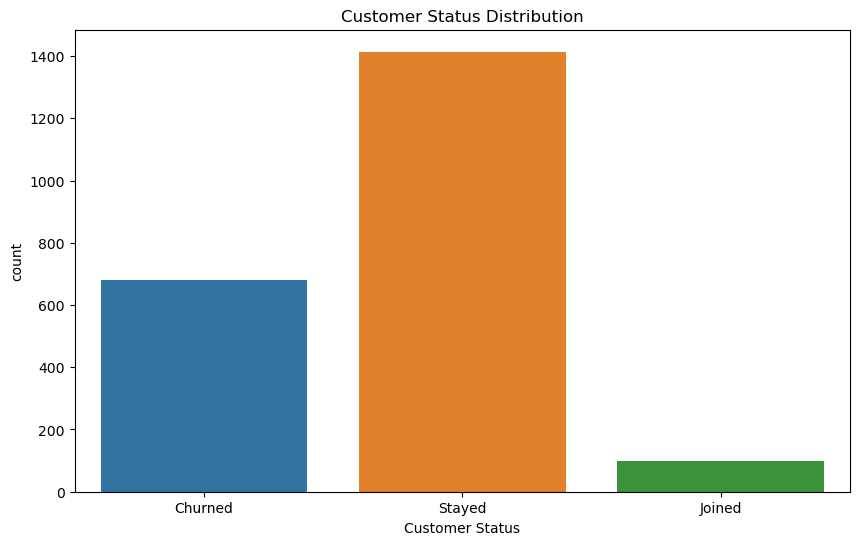

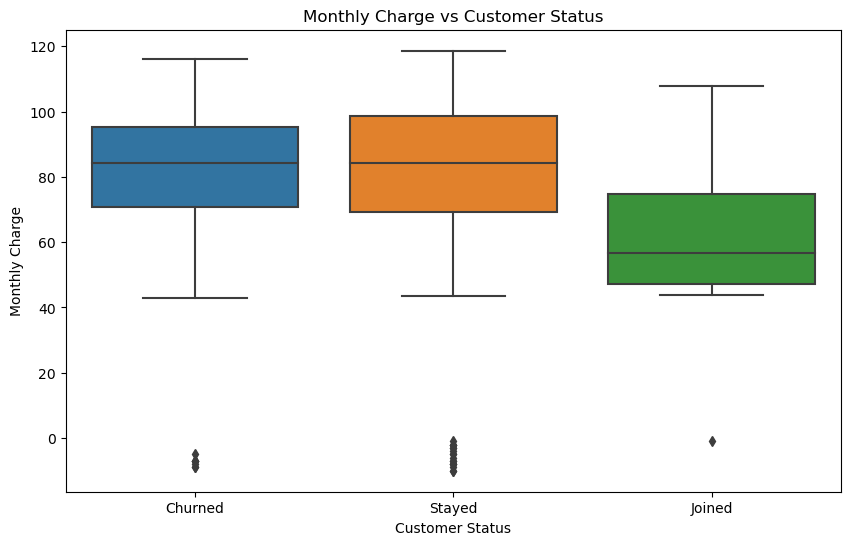

In [8]:
# Visualizing Key Features
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Status', data=df)
plt.title('Customer Status Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Monthly Charge', data=df)
plt.title('Monthly Charge vs Customer Status')
plt.show()

In [9]:
# Hypothesis Testing: Contract type influences customer churn
# Create contingency table
contract_churn = pd.crosstab(df['Contract'], df['Customer Status'])

# Chi-Square Test
chi2, p, dof, ex = stats.chi2_contingency(contract_churn)

print("\nChi-Square Test Results for Contract Type vs Customer Status:")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-Square Test Results for Contract Type vs Customer Status:
Chi2: 528.1497272822595, p-value: 5.458992001442677e-113


In [10]:
# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Contract type significantly influences customer churn.")
else:
    print("Fail to reject the null hypothesis: Contract type does not significantly influence customer churn.")

Reject the null hypothesis: Contract type significantly influences customer churn.


In [11]:
# Further Hypotheses can be tested similarly
# Example: Testing influence of Online Security on Customer Status

# Create contingency table
security_churn = pd.crosstab(df['Online Security'], df['Customer Status'])

# Chi-Square Test
chi2, p, dof, ex = stats.chi2_contingency(security_churn)

print("\nChi-Square Test Results for Online Security vs Customer Status:")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-Square Test Results for Online Security vs Customer Status:
Chi2: 194.3741956426102, p-value: 6.19697442787756e-43


In [12]:
#Interpretation
if p < 0.05:
    print("Reject the null hypothesis: Online Security significantly influences customer churn.")
else:
    print("Fail to reject the null hypothesis: Online Security does not significantly influence customer churn.")

Reject the null hypothesis: Online Security significantly influences customer churn.


In [13]:
# Identify at-risk customers (e.g., based on high Monthly Charges)
at_risk_customers = df[df['Monthly Charge'] > df['Monthly Charge'].quantile(0.75)]

# Randomly assign to control and treatment groups
np.random.seed(42)
at_risk_customers.loc[:, 'Group'] = np.random.choice(['Control', 'Treatment'], size=len(at_risk_customers))

# Assume we have a column 'Discount Offered' to indicate if a discount was offered
at_risk_customers.loc[:, 'Discount Offered'] = np.where(at_risk_customers['Group'] == 'Treatment', True, False)

# Analyze churn rates in control and treatment groups
control_group = at_risk_customers[at_risk_customers['Group'] == 'Control']
treatment_group = at_risk_customers[at_risk_customers['Group'] == 'Treatment']

control_churn_rate = control_group['Customer Status'].value_counts(normalize=True).get('Churned', 0)
treatment_churn_rate = treatment_group['Customer Status'].value_counts(normalize=True).get('Churned', 0)

print(f"Control Group Churn Rate: {control_churn_rate}")
print(f"Treatment Group Churn Rate: {treatment_churn_rate}")

Control Group Churn Rate: 0.31835205992509363
Treatment Group Churn Rate: 0.25177304964539005


C:\Users\mahak kansal\AppData\Local\Temp\ipykernel_27212\1998131525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_customers.loc[:, 'Group'] = np.random.choice(['Control', 'Treatment'], size=len(at_risk_customers))
C:\Users\mahak kansal\AppData\Local\Temp\ipykernel_27212\1998131525.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_customers.loc[:, 'Discount Offered'] = np.where(at_risk_customers['Group'] == 'Treatment', True, False)


In [14]:
# Hypothesis Testing
# Null Hypothesis: The retention strategy has no effect on churn rate
# Alternative Hypothesis: The retention strategy reduces churn rate

# Perform a two-proportion z-test
count_control = control_group['Customer Status'].value_counts().get('Churned', 0)
count_treatment = treatment_group['Customer Status'].value_counts().get('Churned', 0)
n_control = len(control_group)
n_treatment = len(treatment_group)

z_stat, p_value = proportions_ztest([count_control, count_treatment], [n_control, n_treatment])

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The retention strategy significantly reduces churn rate.")
else:
    print("Fail to reject the null hypothesis: The retention strategy does not significantly reduce churn rate.")

Z-statistic: 1.7288014480074396, P-value: 0.08384463692580489
Fail to reject the null hypothesis: The retention strategy does not significantly reduce churn rate.


In [15]:
# Machine Learning Models

# Print the actual column names
print("Column names in the dataset:", df.columns.tolist())

Column names in the dataset: ['Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status']


In [16]:
# Check if the column 'Customer Status' exists
if 'Customer Status' not in df.columns:
    # If the column does not exist, check for similar column names
    possible_churn_columns = [col for col in df.columns if 'churn' in col.lower()]
    print("Possible churn columns:", possible_churn_columns)

    # Assuming the dataset might use a different naming convention, we can try to infer it
    if possible_churn_columns:
        churn_column = possible_churn_columns[0]
    else:
        raise KeyError("No column related to churn found in the dataset.")
else:
    churn_column = 'Customer Status'

# Print the selected churn column
print("Using churn column:", churn_column)

Using churn column: Customer Status


In [17]:
# Separate the target variable before converting to dummy variables
y = df[churn_column]

# Drop the target variable from the dataframe
X = df.drop(churn_column, axis=1)

# Print column names before applying pd.get_dummies()
print("Column names before pd.get_dummies():", X.columns.tolist())

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Print column names after applying pd.get_dummies()
print("Column names after pd.get_dummies():", X.columns.tolist())

# Ensure the target variable is not affected by dummy conversion
print("First few rows of y:", y.head())

Column names before pd.get_dummies(): ['Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
Column names after pd.get_dummies(): ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Gender_Male', 'Married_Yes', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 'Internet Type_DSL', 'Internet Type_Fi

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets using the encoded target
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1755, 30)
X_test shape: (439, 30)
y_train shape: (1755,)
y_test shape: (439,)


In [19]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [20]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.62       145
           1       0.45      0.31      0.37        16
           2       0.81      0.88      0.85       278

    accuracy                           0.76       439
   macro avg       0.65      0.59      0.61       439
weighted avg       0.75      0.76      0.76       439



C:\Users\mahak kansal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Compute ROC AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("Logistic Regression ROC AUC Score:", roc_auc)

# Calculate MAE for Logistic Regression
mae_log_reg = mean_absolute_error(y_test, y_pred)
print("Logistic Regression MAE:", mae_log_reg)

Logistic Regression ROC AUC Score: 0.8928502874297782
Logistic Regression MAE: 0.43507972665148065


In [22]:
# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
y_pred_prob = tree_clf.predict_proba(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       145
           1       0.61      0.69      0.65        16
           2       0.81      0.84      0.82       278

    accuracy                           0.74       439
   macro avg       0.68      0.70      0.69       439
weighted avg       0.74      0.74      0.74       439



In [23]:
# Compute ROC AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("Decision Tree ROC AUC Score:", roc_auc)

# Calculate MAE for Decision Tree
mae_tree = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE:", mae_tree)

Decision Tree ROC AUC Score: 0.7594506933763013
Decision Tree MAE: 0.4874715261958998


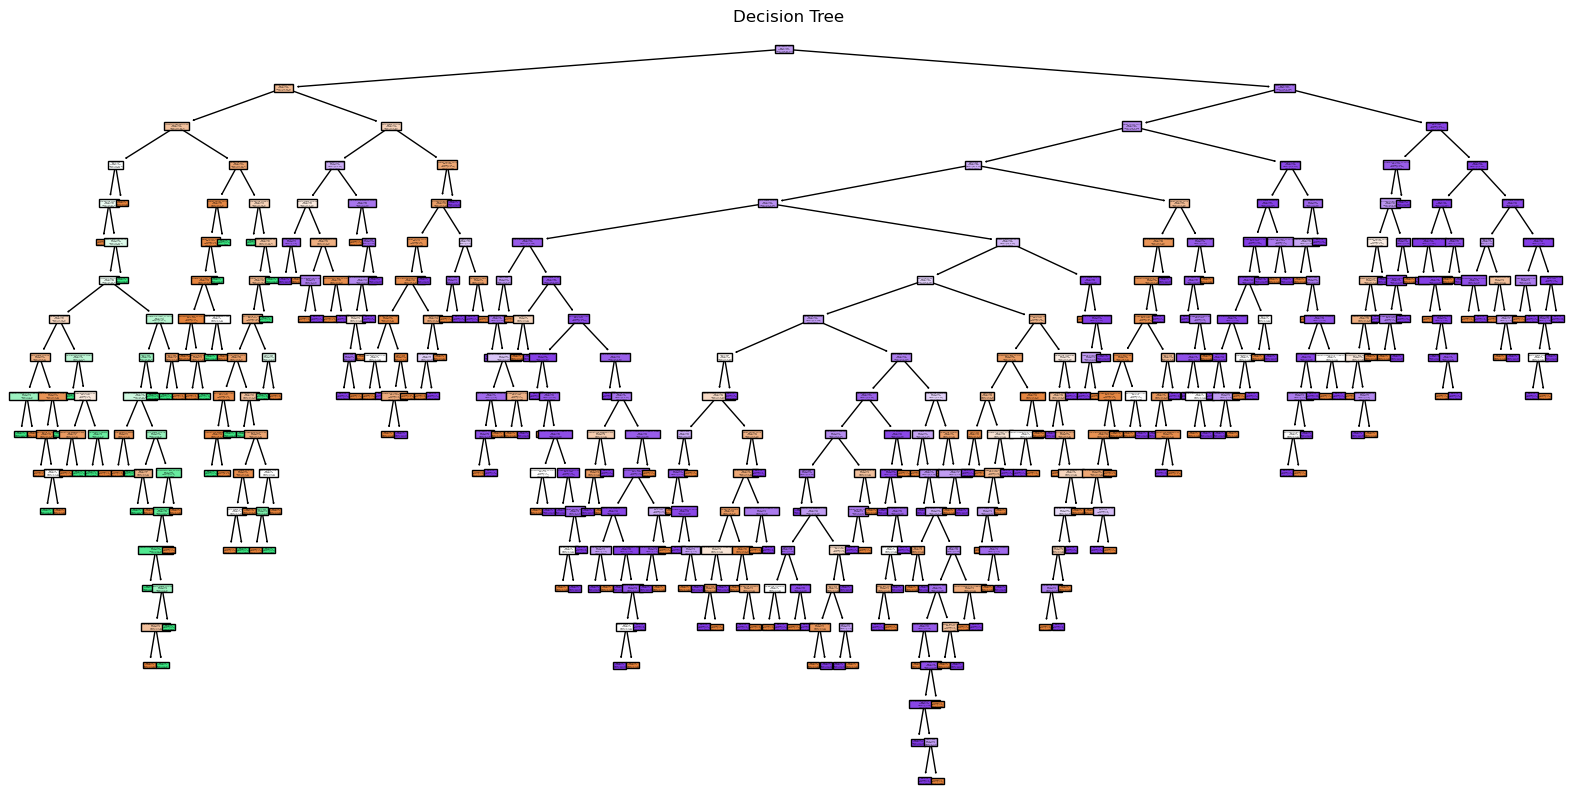

In [24]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))

# Convert X.columns to a list before passing to feature_names
plot_tree(tree_clf, filled=True, feature_names=X.columns.tolist(), class_names=label_encoder.classes_.tolist())
plt.title("Decision Tree")
plt.show()

In [25]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred_prob = rf_clf.predict_proba(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       145
           1       0.64      0.44      0.52        16
           2       0.84      0.93      0.88       278

    accuracy                           0.81       439
   macro avg       0.74      0.66      0.70       439
weighted avg       0.80      0.81      0.80       439



In [26]:
# Compute ROC AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("Random Forest ROC AUC Score:", roc_auc)

# Calculate MAE for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE:", mae_rf)

Random Forest ROC AUC Score: 0.9109476831573554
Random Forest MAE: 0.34851936218678814


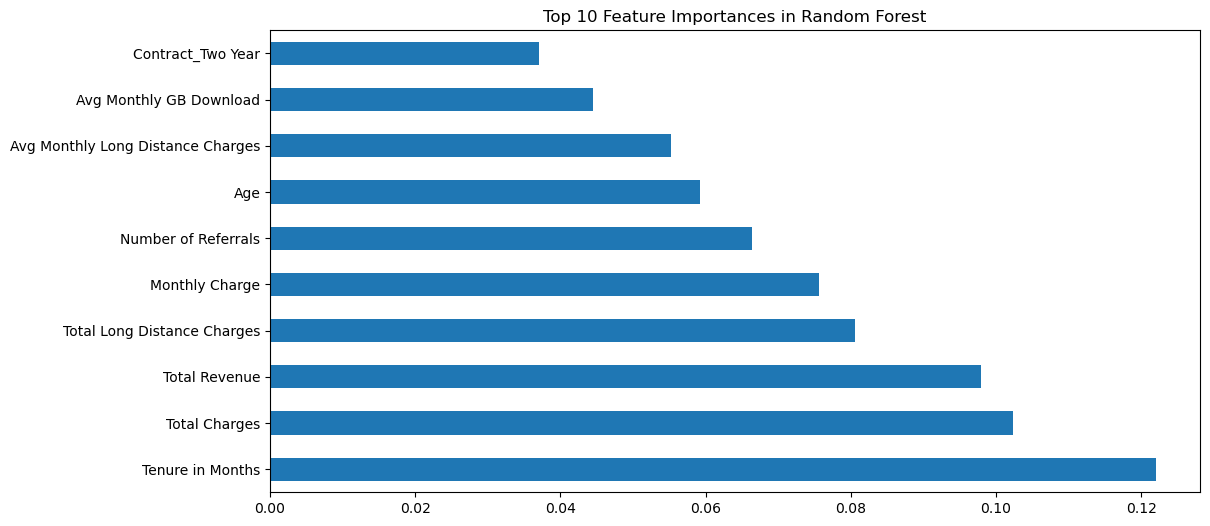

In [27]:
# Plot feature importance from Random Forest
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()

In [28]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
y_pred_prob = gb_clf.predict_proba(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       145
           1       0.62      0.50      0.55        16
           2       0.85      0.92      0.88       278

    accuracy                           0.82       439
   macro avg       0.74      0.69      0.71       439
weighted avg       0.81      0.82      0.81       439



In [29]:
# Compute ROC AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("Gradient Boosting ROC AUC Score:", roc_auc)

# Calculate MAE for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred)
print("Gradient Boosting MAE:", mae_gb)

Gradient Boosting ROC AUC Score: 0.9247080337805573
Gradient Boosting MAE: 0.33940774487471526


In [30]:
# Hyperparameter Optimization for Gradient Boosting using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters found by GridSearchCV:", grid_search.best_params_)
print("Best Accuracy found by GridSearchCV:", grid_search.best_score_)

Best Parameters found by GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy found by GridSearchCV: 0.8250712250712251


In [31]:
# Re-train the Gradient Boosting model with optimized parameters
best_gb_clf = grid_search.best_estimator_
best_gb_clf.fit(X_train, y_train)
y_pred = best_gb_clf.predict(X_test)
y_pred_prob = best_gb_clf.predict_proba(X_test)

print("Optimized Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Optimized Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       145
           1       0.62      0.50      0.55        16
           2       0.84      0.92      0.88       278

    accuracy                           0.81       439
   macro avg       0.74      0.69      0.71       439
weighted avg       0.80      0.81      0.81       439



In [32]:
# Compute ROC AUC score for optimized Gradient Boosting model
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("Optimized Gradient Boosting ROC AUC Score:", roc_auc)

Optimized Gradient Boosting ROC AUC Score: 0.9266136324443538


In [33]:
# Calculate MAE for Optimized Gradient Boosting
mae_best_gb = mean_absolute_error(y_test, y_pred)
print("Optimized Gradient Boosting MAE:", mae_best_gb)

Optimized Gradient Boosting MAE: 0.34851936218678814
